## 삼성 주식 EDA 포트폴리오

In [1]:
# 라이브러리  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 읽기

data = pd.read_csv('Samsung.csv')

data['Date'] = pd.to_datetime(data['Date'])

print(data.head(25))

         Date    Open    High     Low   Close    Adj Close     Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793   74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422   74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523   54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273   40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766   46880000
5  2000-01-11  5820.0  6100.0  5770.0  5770.0  4392.884766   59745000
6  2000-01-12  5610.0  5740.0  5600.0  5720.0  4354.818359   29220000
7  2000-01-13  5600.0  5740.0  5560.0  5710.0  4347.205078   41190000
8  2000-01-14  5720.0  5880.0  5680.0  5830.0  4438.565918   49375000
9  2000-01-17  6000.0  6180.0  5920.0  6100.0  4644.125000   63505000
10 2000-01-18  6160.0  6160.0  5980.0  6100.0  4644.125000   45260000
11 2000-01-19  6000.0  6040.0  5960.0  5960.0  4537.538574   40205000
12 2000-01-20  5860.0  6040.0  5820.0  6040.0  4598.444824   37315000
13 2000-01-21  5950.

In [5]:
# 결측값 확인 

print(data.isnull().sum())
print("")
print(data.dtypes)

# 결측값 Nan은 없으나 거래량이 0인 날짜 발견
# 0을 결측값으로 보고 그 일자의 월별 평균 거래량으로 대체 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [6]:
# 연도-월 정보만 따로 추출

data['Year_Month'] = data['Date'].dt.to_period('M')

# 월별 평균 거래 값 구하고 vol_Yearmonth 라는 컬럼 만들기 

vol_Yearmonth = data[data['Volume']>0].groupby('Year_Month')['Volume'].mean().reset_index()

In [7]:
# year_month 추가 확인용

print(data.head(5))

        Date    Open    High     Low   Close    Adj Close    Volume Year_Month
0 2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793  74195000    2000-01
1 2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422  74680000    2000-01
2 2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523  54390000    2000-01
3 2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273  40305000    2000-01
4 2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766  46880000    2000-01


In [44]:
# 병합  

vol_Yearmonth.rename(columns={'Volume' : 'Volume_Avg'}, inplace=True)

data = pd.merge(data, vol_Yearmonth, on = 'Year_Month', how = 'left')


In [45]:
# 월별 형균 거래량 값 병합 결과 확인
print(data.head())

        Date    Open    High     Low   Close    Adj Close    Volume  \
0 2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793  74195000   
1 2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422  74680000   
2 2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523  54390000   
3 2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273  40305000   
4 2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766  46880000   

  Year_Month  Volume_Avg  
0    2000-01  45126750.0  
1    2000-01  45126750.0  
2    2000-01  45126750.0  
3    2000-01  45126750.0  
4    2000-01  45126750.0  


In [18]:
# 결측값 대체 

data.loc[data['Volume']==0, 'Volume'] = data['Volume_Avg']

print(data[20:25])  # 확인용 
# 23번 행이 잘 변경된 것을 확인 할 수 있음 

         Date    Open    High     Low   Close    Adj Close       Volume  \
20 2000-02-01  5600.0  5680.0  5260.0  5320.0  4050.285889   71470000.0   
21 2000-02-02  5220.0  5370.0  5110.0  5250.0  3996.992188   64105000.0   
22 2000-02-03  5250.0  5460.0  4970.0  5130.0  3905.632813  142765000.0   
23 2000-02-04  5130.0  5130.0  5130.0  5130.0  3905.632813   54614750.0   
24 2000-02-07  5140.0  5330.0  5040.0  5240.0  3989.381104   64140000.0   

   Year_Month  Volume_Avg  
20    2000-02  54614750.0  
21    2000-02  54614750.0  
22    2000-02  54614750.0  
23    2000-02  54614750.0  
24    2000-02  54614750.0  


In [56]:
# 불필요한 값 제거  

data.drop(columns=['Year_Month', 'Volume_Avg'], inplace=True)

In [52]:
# 평균값을 계산하고 거래량을 변경하는 과정에서 data type이 정수에서 실수로 변경되었음을 확인

print(data.dtypes)

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Year_Month         period[M]
Volume_Avg             int64
dtype: object


In [47]:
# 원래의 데이터 타입인 정수형으로 변경 
 
data['Volume'] = data['Volume'].astype('int64')

print(data.dtypes)

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Year_Month         period[M]
Volume_Avg           float64
dtype: object


### 가설 설정 

1. 전일 주가 변동 폭은 다음날 주가 변동에 유의미한 영향을 미친다.

2. 특정 주가 패턴이 발생한 후 다음날 주가는 일정한 가격 경향을 보인다.

3. 매 분기 별 마지막 주가 변동 패턴이 분기내의 매 달 마무리의 주가 변동과 다르다. 

<!-- 4. USD가 오르면 삼성 주가도 오를 것이다. -> USD 데이터가 적당한걸 찾으면 추가  -->

In [58]:
# 그해 월별 평균 값 -> 필요할거 같아서 일단 추출해놓음 
vol_Yearmonth['Volume_Avg'] = vol_Yearmonth['Volume_Avg'].astype('int64')
print(vol_Yearmonth)

    Year_Month  Volume_Avg
0      2000-01    45126750
1      2000-02    54614750
2      2000-03    58108636
3      2000-04    48618055
4      2000-05    52636944
..         ...         ...
264    2022-01    14094903
265    2022-02    13450284
266    2022-03    14409354
267    2022-04    14756225
268    2022-05    14135625

[269 rows x 2 columns]


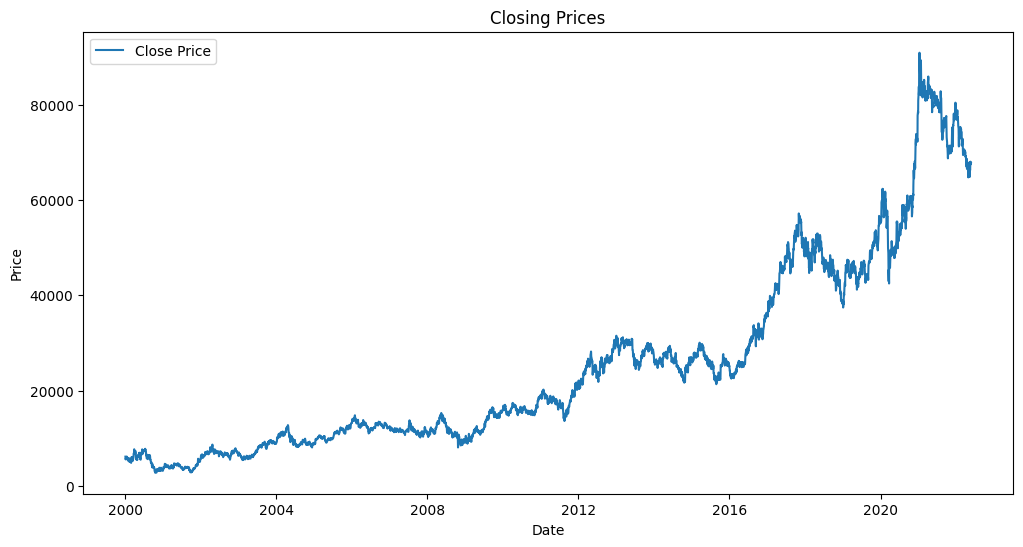

In [35]:
# 장 마감 가격 시계열 그래프 

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

- 장 마감 주가 시계열 그래프로 확인해본 결과 점차 증가하는 추세를 확인 가능

- 2016년과 202년 사이 주가가 급락했던 시점이 생기는데 2018~2019년 사이

- 코로나로 인한 펜데믹으로 주가가 하락했다가 전 세계적 규제 완화로 인한 주가 상승

In [54]:
# 가설 검증 

# 1. 전일 주가 변동 폭은 다음날 주가 변동에 유의미한 영향을 미친다. 

In [55]:
# 가설 검증 

# 2. 특정 주가 패턴이 발생한 후 다음날 주가는 일정한 가격 경향을 보인다.  

In [56]:
# 가설 검증 

# 3. 매 분기 별 마지막 주가 변동 패턴이 분기내의 매 달 마무리의 주가 변동과 다르다.